# Collaborative Filtering

In [1]:
#import library
import pandas as pd
from zipfile import ZipFile
import numpy as np

#modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#visualization
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

In [3]:
tourism = pd.read_csv('Dataset_tourism.csv', error_bad_lines=False, sep=',')
rating = pd.read_csv('tourism_rating.csv', error_bad_lines=False, sep=';')

In [4]:
tourism.head()

,Place_Id,Place_Name,Description,City,Category,Price,Lat,Long,Rating
0,29,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Jakarta,Pusat Perbelanjaan,0,"-6,1667887","106,8265261",5.0
1,69,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Jakarta,Budaya,0,"-6,2022482","106,8451968",5.0
2,95,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",Yogyakarta,Taman Hiburan,0,"-7,8229089","110,3756894",5.0
3,124,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Yogyakarta,Budaya,0,"-7,8010347","110,3751922",5.0
4,278,Masjid Daarut Tauhiid Bandung,pada bulan Juli 1993 berdirilah sebuah masjid ...,Bandung,Tempat Ibadah,0,"-6,863527","107,5899194",4.9


In [5]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     576 non-null    int64  
 1   Place_Name   576 non-null    object 
 2   Description  576 non-null    object 
 3   City         576 non-null    object 
 4   Category     576 non-null    object 
 5   Price        576 non-null    int64  
 6   Lat          576 non-null    object 
 7   Long         576 non-null    object 
 8   Rating       576 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 40.6+ KB


In [8]:
tourism.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
City           0
Category       0
Price          0
Lat            0
Long           0
Rating         0
dtype: int64

In [6]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3.0
1,1,344,2.0
2,1,5,5.0
3,1,373,3.0
4,1,101,4.0


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10140 non-null  int64  
 1   Place_Id       10140 non-null  int64  
 2   Place_Ratings  10140 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 237.8 KB


In [9]:
rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [10]:
tourism['Category'].value_counts()

Taman Hiburan         190
Budaya                152
Cagar Alam            113
Bahari                 87
Pusat Perbelanjaan     17
Tempat Ibadah          17
Name: Category, dtype: int64

### Preprocessing Data

In [13]:
all_dataset = np.concatenate((tourism.Place_Id.unique(),
                              rating.Place_Id.unique()))
all_dataset = np.sort(np.unique(all_dataset))

len(all_dataset)

576

In [14]:
df = pd.merge(rating, tourism[['Place_Id','Place_Name','Description','City','Category']], on='Place_Id',how='left')
df

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3.0,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2.0,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5.0,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3.0,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4.0,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
10135,401,588,4.7,Gelora Bung Karno,Nikmati pertandingan olahraga atau berolahraga...,Jakarta,Taman Hiburan
10136,402,589,3.8,Jakarta Cathedral,"Kunjungi Jakarta Cathedral, gereja katedral Ka...",Jakarta,Budaya
10137,403,590,4.2,M Bloc Space,"Bersantai di M Bloc Space, tempat yang penuh d...",Jakarta,Budaya
10138,404,591,4.5,Art:1 New Museum,Lihat karya seni kontemporer di Art:1 New Muse...,Jakarta,Budaya


In [15]:
df.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
dtype: int64

In [20]:
df1=rating
df1

,User_Id,Place_Id,Place_Ratings
0,1,179,3.0
1,1,344,2.0
2,1,5,5.0
3,1,373,3.0
4,1,101,4.0
...,...,...,...
10135,401,588,4.7
10136,402,589,3.8
10137,403,590,4.2
10138,404,591,4.5


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10140 non-null  int64  
 1   Place_Id       10140 non-null  int64  
 2   Place_Ratings  10140 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 237.8 KB


In [22]:
unique_users = df1["User_Id"].unique().tolist()

user_encoder = {user: index for index, user in enumerate(unique_users)}

encoder_to_user = {index: user for index, user in enumerate(unique_users)}

In [23]:
unique_places = df1["Place_Id"].unique().tolist()

place_encoder = {place: index for index, place in enumerate(unique_places)}

encoder_to_place = {index: place for index, place in enumerate(unique_places)}


In [24]:
df1['user_encoded'] = df1['User_Id'].map(user_encoder)

df1['place_encoded'] = df1['Place_Id'].map(place_encoder)

In [25]:
num_users = len(user_encoder)
num_places = len(place_encoder)

df1['Place_Ratings'] = df1['Place_Ratings'].values.astype(np.float32)

min_rating = df1['Place_Ratings'].min()
max_rating = df1['Place_Ratings'].max()

print('Number of Users: {}, Number of Places: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_places, min_rating, max_rating
))


Number of Users: 405, Number of Places: 576, Min Rating: 1.0, Max Rating: 5.0


In [26]:
df1 = df1.sample(frac=1, random_state=42)
df1

,User_Id,Place_Id,Place_Ratings,user_encoded,place_encoded
1107,35,318,2.0,34,279
2039,63,366,2.0,62,338
5396,163,114,2.0,162,239
6167,185,401,4.0,184,373
1330,42,202,3.0,41,60
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [40]:
place_id = df.Place_Id.tolist()

place_name = df.Place_Name.tolist()

place_category = df.Category.tolist()

place_desc = df.Description.tolist()

place_city = df.City.tolist()


In [42]:
data_tourism = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
})

data_tourism

,id,name,category,description,city
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta
...,...,...,...,...,...
10135,588,Gelora Bung Karno,Taman Hiburan,Nikmati pertandingan olahraga atau berolahraga...,Jakarta
10136,589,Jakarta Cathedral,Budaya,"Kunjungi Jakarta Cathedral, gereja katedral Ka...",Jakarta
10137,590,M Bloc Space,Budaya,"Bersantai di M Bloc Space, tempat yang penuh d...",Jakarta
10138,591,Art:1 New Museum,Budaya,Lihat karya seni kontemporer di Art:1 New Muse...,Jakarta


In [27]:
x_values = df1[['user_encoded', 'place_encoded']].values

y_values = df1['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df1.shape[0])

x_train, x_val, y_train, y_val = (
    x_values[:train_indices],
    x_values[train_indices:],
    y_values[:train_indices],
    y_values[train_indices:]
)

print(x_values, y_values)


[[ 34 279]
 [ 62 338]
 [162 239]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.25 0.25 0.25 ... 0.5  0.75 0.25]


In [28]:
class CustomRecommender(tf.keras.Model):

    # Constructor
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(CustomRecommender, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size

        # User embedding layer
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # User bias layer
        self.user_bias = layers.Embedding(num_users, 1)

        # Place embedding layer
        self.place_embedding = layers.Embedding(
            num_places,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Place bias layer
        self.place_bias = layers.Embedding(num_places, 1)

    # Model's forward pass
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])

        dot_user_place = tf.tensordot(user_vector, place_vector, 2)

        # Combine the vectors and biases
        x = dot_user_place + user_bias + place_bias

        return tf.nn.sigmoid(x)  # Applying sigmoid activation


In [29]:
custom_model = CustomRecommender(num_users, num_places, embedding_size=100)

# Model compilation
custom_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [31]:
training_history = custom_model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
)


Epoch 1/100
1014/1014 [==============================] - 7s 7ms/step - loss: 0.6542 - root_mean_squared_error: 0.3151 - val_loss: 0.7263 - val_root_mean_squared_error: 0.3676
Epoch 2/100
1014/1014 [==============================] - 8s 8ms/step - loss: 0.6536 - root_mean_squared_error: 0.3147 - val_loss: 0.7271 - val_root_mean_squared_error: 0.3680
Epoch 3/100
1014/1014 [==============================] - 6s 6ms/step - loss: 0.6518 - root_mean_squared_error: 0.3134 - val_loss: 0.7260 - val_root_mean_squared_error: 0.3674
Epoch 4/100
1014/1014 [==============================] - 8s 8ms/step - loss: 0.6505 - root_mean_squared_error: 0.3122 - val_loss: 0.7278 - val_root_mean_squared_error: 0.3686
Epoch 5/100
1014/1014 [==============================] - 8s 7ms/step - loss: 0.6536 - root_mean_squared_error: 0.3145 - val_loss: 0.7269 - val_root_mean_squared_error: 0.3681
Epoch 6/100
1014/1014 [==============================] - 3s 3ms/step - loss: 0.6518 - root_mean_squared_error: 0.3136 - val_l

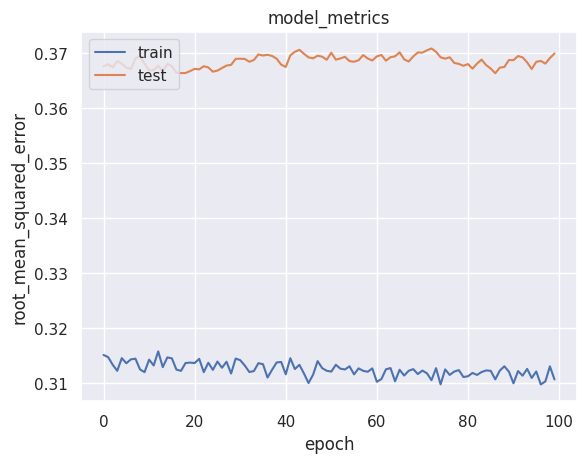

In [32]:
plt.plot(training_history.history['root_mean_squared_error'])
plt.plot(training_history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [44]:
selected_user_id = df1.User_Id.sample(1).iloc[0]
place_visited_by_user = df1[df1.User_Id == selected_user_id]

place_not_visited = data_tourism[~data_tourism['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_encoder.keys()))
)

places_not_visited_encoded = [[place_encoder.get(x)] for x in place_not_visited]
selected_user_encoded = user_encoder.get(selected_user_id)
user_place_array = np.hstack(
    ([[selected_user_encoded]] * len(places_not_visited_encoded), places_not_visited_encoded)
)

In [49]:
ratings = custom_model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    encoder_to_place.get(places_not_visited_encoded[x][0]) for x in top_ratings_indices
]


print('Showing recommendations for user: {}'.format(selected_user_id))
print('===' * 9)
print('Top-rated places for the user')
print('----' * 8)

top_places_user = (
    places_visited_by_user.sort_values(
        by='Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = data_tourism[data_tourism['id'].isin(top_places_user)]
pd.DataFrame(place_df_rows)


17/17 [==============================] - 0s 5ms/step
Showing recommendations for user: 276
Top-rated places for the user
--------------------------------


,id,name,category,description,city
291,35,Grand Indonesia Mall,Pusat Perbelanjaan,Grand Indonesia merupakan mal di Jakarta. Mal ...,Jakarta
335,203,Galaxy Waterpark Jogja,Taman Hiburan,Galaxy Waterpark adalah taman rekreasi air yan...,Yogyakarta
452,203,Galaxy Waterpark Jogja,Taman Hiburan,Galaxy Waterpark adalah taman rekreasi air yan...,Yogyakarta
505,47,Taman Situ Lembang,Taman Hiburan,Taman Situ Lembang adalah sebuah taman kota ya...,Jakarta
561,112,Bukit Bintang Yogyakarta,Taman Hiburan,Bukit Bintang merupakan salah satu lokasi nong...,Yogyakarta
...,...,...,...,...,...
9731,35,Grand Indonesia Mall,Pusat Perbelanjaan,Grand Indonesia merupakan mal di Jakarta. Mal ...,Jakarta
9768,35,Grand Indonesia Mall,Pusat Perbelanjaan,Grand Indonesia merupakan mal di Jakarta. Mal ...,Jakarta
9787,112,Bukit Bintang Yogyakarta,Taman Hiburan,Bukit Bintang merupakan salah satu lokasi nong...,Yogyakarta
9790,388,Watu Gunung Ungaran,Cagar Alam,Objek wisata alam memang sangat cocok dikunjun...,Semarang


In [51]:
print('----' * 8)
print('Top 10 Recommended Places')
print('----' * 8)

recommended_places = data_tourism[data_tourism['id'].isin(recommended_place_ids)]
recommended_places.head(10)


--------------------------------
Top 10 Recommended Places
--------------------------------


,id,name,category,description,city
159,243,Kampung Korea Bandung,Budaya,Kampung Korea adalah sebuah kawasan di kota Ba...,Bandung
173,224,Dago Dreampark,Taman Hiburan,Dago Dreampark merupakan wisata kekinian di Ko...,Bandung
420,340,Desa Wisata Lembah Kalipancur,Taman Hiburan,Wisata alam tengah menjadi sorotan bagi dunia ...,Semarang
487,256,Wisata Batu Kuda,Cagar Alam,Kawasan Batu Kuda berupa perbukitan dengan hut...,Bandung
524,332,Rainbow Garden,Cagar Alam,Rainbow Garden Harapan Indah salah satu taman ...,Bandung
862,353,Taman Srigunting,Taman Hiburan,Merupakan salah satu landmark di Kawasan Kota ...,Semarang
1023,256,Wisata Batu Kuda,Cagar Alam,Kawasan Batu Kuda berupa perbukitan dengan hut...,Bandung
1072,224,Dago Dreampark,Taman Hiburan,Dago Dreampark merupakan wisata kekinian di Ko...,Bandung
1128,254,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
1133,117,The World Landmarks - Merapi Park Yogyakarta,Taman Hiburan,Merapi Park merupakan salah satu tempat wisata...,Yogyakarta
